In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# load the dataset
df = pd.read_csv('happiness/2020.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [6]:
# Note that there are outliers in many features

# compute mean and standard deviation

# plot correlation matrices
# link in more datasets from world stats datasets. 

In [7]:
# delete explained by columns, this is redundant data
L_SCORE_DYSTOPIA = df['Ladder score in Dystopia'].mean()

df.drop(['Explained by: Log GDP per capita',
         'Explained by: Social support',
         'Explained by: Healthy life expectancy',
         'Explained by: Freedom to make life choices',
         'Explained by: Generosity',
         'Explained by: Perceptions of corruption',
         'Ladder score in Dystopia'], axis=1, inplace=True)

In [8]:
# rename columns
df.rename(columns = {'Logged GDP per capita':'gdp_per_capita', 
                     'Social support':'support',
                     'Healthy life expectancy':'life_expectancy', 
                     'Freedom to make life choices':'freedom', 
                     'Perceptions of corruption':'corruption', 
                     'Ladder score': 'l_score', 
                     'Country name': 'country', 
                     'Generosity': 'generosity',
                     'Regional indicator': 'r_indicator'}, inplace = True)
df.head()

,country,r_indicator,l_score,Standard error of ladder score,upperwhisker,lowerwhisker,gdp_per_capita,support,life_expectancy,freedom,generosity,corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,2.168266


In [9]:
# Get preliminary descriptions of how the data is spread out.
df.describe()

,l_score,Standard error of ladder score,upperwhisker,lowerwhisker,gdp_per_capita,support,life_expectancy,freedom,generosity,corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,3.440810


In [10]:
# get rank, display the worlds 10 happiest/10 saddest countries
df["rank"] = df['l_score'].rank() 

print("Top 10 countries according to their ladder scores:")
print("--------------------------------------------------")
print(df.nlargest(10, 'rank')['country'])

print("\nBottom 10 countries according to their ladder scores:")
print("--------------------------------------------------")
print(df.nsmallest(10, 'rank')['country'])

Top 10 countries according to their ladder scores:
--------------------------------------------------
0        Finland
1        Denmark
2    Switzerland
3        Iceland
4         Norway
5    Netherlands
6         Sweden
7    New Zealand
8        Austria
9     Luxembourg
Name: country, dtype: object

Bottom 10 countries according to their ladder scores:
--------------------------------------------------
152                 Afghanistan
151                 South Sudan
150                    Zimbabwe
149                      Rwanda
148    Central African Republic
147                    Tanzania
146                    Botswana
145                       Yemen
144                      Malawi
143                       India
Name: country, dtype: object


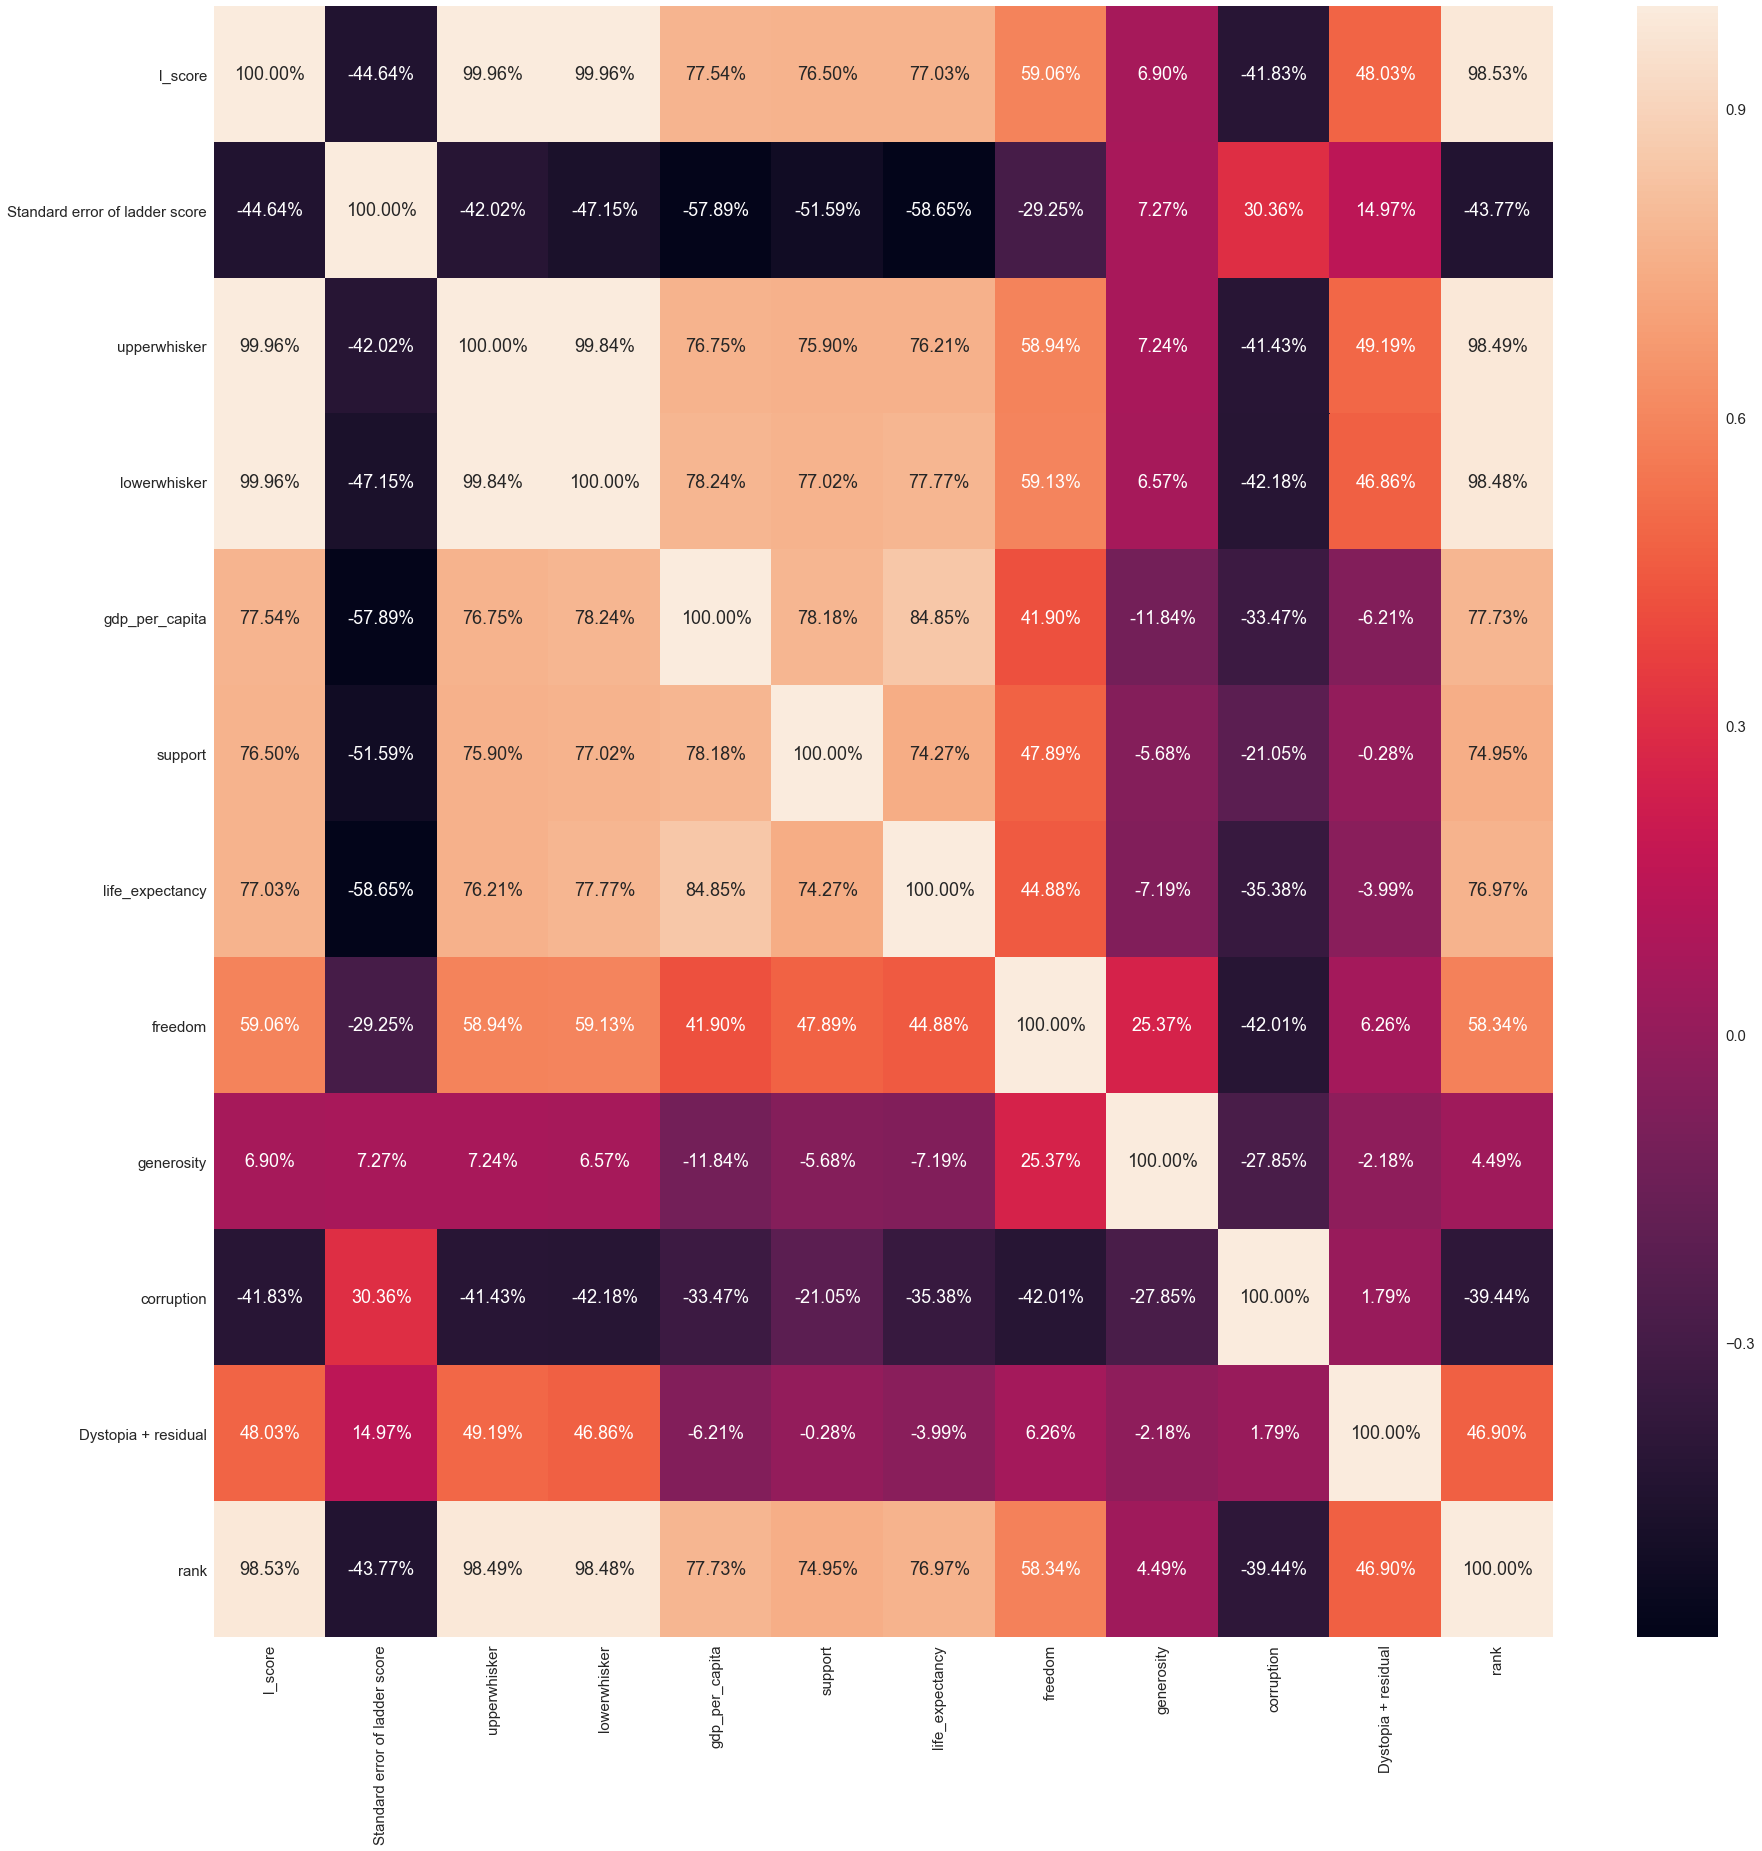

In [11]:
corrs = df.corr()
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.5)
sns.heatmap(corrs, annot=True, fmt='.2%')

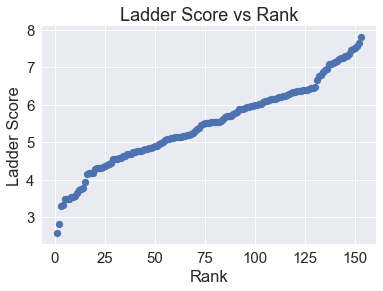

In [12]:
# scatter plot of ladder score to detect outliers
plt.scatter(df['rank'], df['l_score'])
plt.xlabel('Rank')
plt.ylabel('Ladder Score')
plt.title('Ladder Score vs Rank')
plt.show()

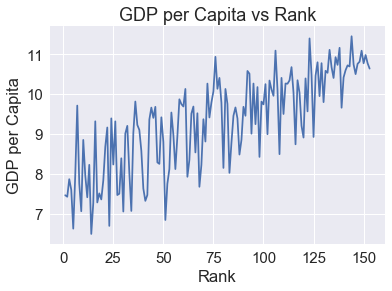

Covariance: 41.38668696365789


In [13]:
plt.plot(df['rank'], df['gdp_per_capita'])
plt.xlabel('Rank')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita vs Rank')
plt.show()
cov_gdp = df['rank'].cov(df['gdp_per_capita'])
print("Covariance: " + str(cov_gdp))

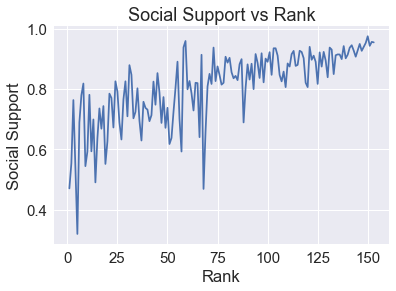

Covariance: 4.0335692611776315


In [14]:
plt.plot(df['rank'], df['support'])
plt.xlabel('Rank')
plt.ylabel('Social Support')
plt.title('Social Support vs Rank')
plt.show()
cov_support = df['rank'].cov(df['support'])
print("Covariance: " + str(cov_support))

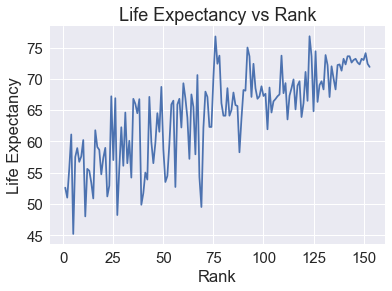

Covariance: 4.0335692611776315


In [15]:
plt.plot(df['rank'], df['life_expectancy'])
plt.xlabel('Rank')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Rank')
plt.show()
cov_life_expectancy = df['rank'].cov(df['life_expectancy'])
print("Covariance: " + str(cov_support))

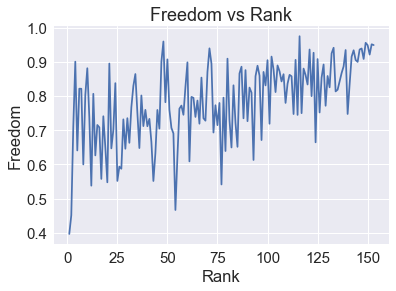

Covariance: 3.0451394028355265


In [20]:
plt.plot(df['rank'], df['freedom'])
plt.xlabel('Rank')
plt.ylabel('Freedom')
plt.title('Freedom vs Rank')
plt.show()
cov_freedom = df['rank'].cov(df['freedom'])
print("Covariance: " + str(cov_freedom))

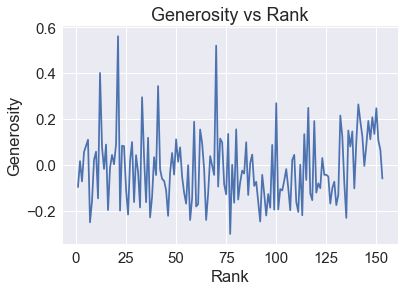

Covariance: 0.3021841441973686


In [21]:
plt.plot(df['rank'], df['generosity'])
plt.xlabel('Rank')
plt.ylabel('Generosity')
plt.title('Generosity vs Rank')
plt.show()
cov_generosity = df['rank'].cov(df['generosity'])
print("Covariance: " + str(cov_generosity))

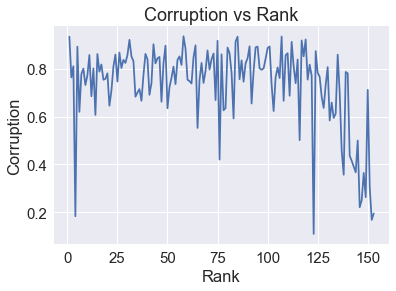

Covariance: -3.061035000177631


In [22]:
plt.plot(df['rank'], df['corruption'])
plt.xlabel('Rank')
plt.ylabel('Corruption')
plt.title('Corruption vs Rank')
plt.show()
cov_corruption = df['rank'].cov(df['corruption'])
print("Covariance: " + str(cov_corruption))

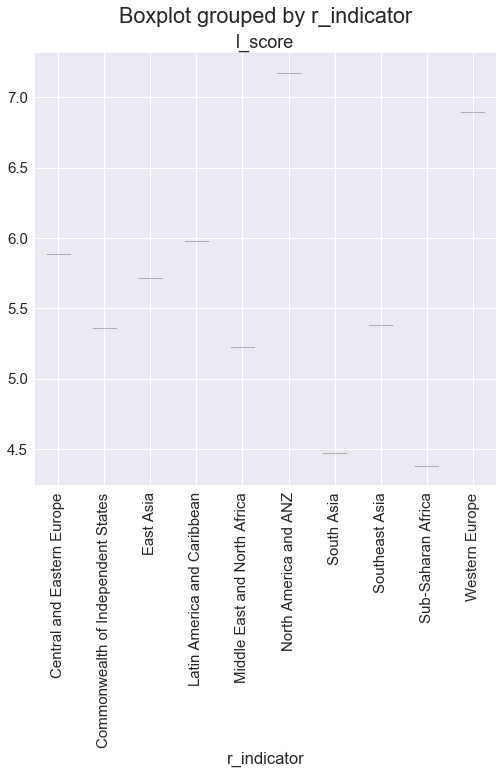

In [58]:
# average ladder score for each region
group = df.groupby('r_indicator').mean()
group = group.reset_index()
fig, ax = plt.subplots(figsize=(8,8))
group.boxplot('l_score', 'r_indicator', ax=ax)
plt.xticks(rotation=90)
plt.show()